"Geo Data Science with Python" 
### Notebook Exercise 7b

---

# Selecting points inside a boundary

If you work in teams, please indicate your colaborators below!

In [1]:
NAME = "Faisal Adams"
COLLABORATORS = "Ben Eppinger"

<div class="alert alert-warning">

Exercise 07b
    
total points: 34/25
    
    
Summary:
- A: 9/10 (extra credit)
- B: 25/25
    
You have one mistake: first test in part A should be true. 

    
</div>

---
# Part A: Find out which points locate inside a region (optional practice)

(10 extra credit points)

In the code cell below, you have given x and y coordiantes of two points p1 and p2 as well as an array containing a nested list of coordinate pairs. The data are defined in a code cell below this task. You are supposed to automatically test, whether the two points lcoate inside the polygon using Python code. For that you have to convert the points and the polygonArray to shapely objects and use the correct shapely function to assing the test result to two variables `test` and `test2`. In detail, perform the following steps:

* Import the objects **Point** and **Polygon** from the package shapely.geometry in the way, that you do not need any prefix to use the objects Point and Polygon (1 point)
* Define two points `p1` and `p2` as shapely Points, given the data below (2 points)
* Convert the polygon given by the variable `polygonArray` to a list of tuples holding coordinate pairs and save them in the variable `PolygonList`. The structure of the list should be appropriate to serve as input for the shapely object Polygon in the next step. (3 points)
* Define a shapely polygon `poly1` using the coordinates stored in `PolygonList` (1 point)
* Check whether point `p1` and point `p2` locate in the polygon `poly1` and assign the test results to the variables `polytest1` and `polytest2`, respectively (2 points)

Fill your code in the answer code cell below. Make sure to comment your code well!!! Use the same variable names as stated in the task.

In [2]:
import numpy as np

# x and y coordinates of two points, given as numbers
p1_y = 24.952242
p1_x = 60.1696017
p2_y = 24.976567
p2_x = 60.1612500

# x and y coordinates of 4 points defining a polygon, given as a numpy array [y,x]
polygonArray = np.array([[24.950899, 60.169158], [24.953492, 60.169158], [24.953510,60.170104], [24.950958,60.169990]])

In [3]:
from shapely.geometry import Point, Polygon 

# creating shapely point variables for the point coordinates
p1 = Point(p1_x, p1_y)
p2 = Point (p2_x, p2_y)

# converting cppdinates into a list of tuples
PolygonList = [tuple(i) for i in polygonArray]

# converting tuple list into a polygon
poly1 = Polygon(PolygonList)

# checking if points are inside the polygon
polytest1 = poly1.contains(p1)
polytest2 = poly1.contains(p2)


print(poly1)

POLYGON ((24.950899 60.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950958 60.16999, 24.950899 60.169158))


In [4]:
# Print out the results of your test

print('Using the "within" method, we can confirm that:')
print (f'p1 being inside poly1 is {polytest1}')
print (f'p2 being inside poly1 is {polytest2}')



Using the "within" method, we can confirm that:
p1 being inside poly1 is False
p2 being inside poly1 is False


---
# Part B: Calculate statistics for a geographical region

(25 points)

In this task, you should retrieve a gridded dataset and calculate mean of one of three variables (surface temperature, snowfall **or** evaporation) within the state of California and Utah, during the month of January 2021.


### You have given:

- Link to the file containing one month GLDAS NOAH model simulations from NASA's GESDISC OpenDAP server defined as url below. Note: the dataset contains only one grid, we will not do any time series analysis, only work with the spatial (lat/lon) dimensions.

  url = https://hydro1.gesdisc.eosdis.nasa.gov/opendap/hyrax/GLDAS/GLDAS_CLSM10_M.2.1/2021/GLDAS_CLSM10_M.A202101.021.nc4


- A file containing the boundary of California and Utah: boundary_CA.csv, boundary_UT.csv
- Bounding box of the study region (encompassing both regions and a buffer):
    - minLat = 28
    - maxLat = 45
    - minLon = -124
    - maxLon = -106


### You should do the following:

- Import all needed packages
- Read the boundary files for California and Utah
- Open connection to the netcdf file via pydap and with your EarthData account
- Retrieve information about either of the following variables from the GLDAS dataset: `AvgSurfT_inst`, `Snowf_tavg` or `Evap_tavg`.
- Retrieve metdadata and mappings (lat, lon, ...)
- Download the needed subset of the global dataset, covering the regions of California and Utah. **Note**: you will have to find indices that correspond to coordinates of the bounding box given above.
- Find gridpoints located inside both states using classes and methods of the module shapely, and generate a mask for each of the regions of California and Utah
- The mask should have the same shape as the downloaded datagrid its values should code 1 for gridpoints inside and 0 for gridpoints outside the region.
- Apply the mask to the grid and calculate mean variable (surface temperature, snowfall or evaporation) for both regions. Note: consider a method, that does not include points outside the mask in the mean calculation, e.g. set points outside to nan and use np.nanmean().)
- Make a testplot of your masks, to see if they are correct.
- Generate a separate map of the grided dataset within the bounding box. Plot also the boundaries/polygons of both states.
- Don't forget to comment your code
- Structure your notebook into different work steps. Make use of the notebook markdown cells, add sections headers for different steps you are taking, or similar
- Formulate a in a decent report answering the questions below, in a mark-down cell below your code cells.


### Answer the following questions:

- Which dataset did you choose (surface temperature, snowfall **or** evaporation) ?
- What is the fill or missing value of the dataset ?
- What is the unit of the dataset?
- How many grid points locate inside the state of California?
- How many grid points locate inside the state of Utah?
- What is the average surface temperature / snowfall / evaporation during January 2021 in California?
- What is the average surface temperature / snowfall / evaporation during January 2021 in Utah?
- Which state got more snow during that month?


## Answer Code
### Imports 
The first step is to import the modules to be utilized

In [5]:
from pydap.client import open_url       
from pydap.cas.urs import setup_session 
import numpy as np
from shapely.geometry import Point, Polygon
from matplotlib import pyplot as plt

The import code in the cell below is a special case to bypass the SSL Certificate Verification error I encountered

In [6]:
#workaround for SSL certification verification issue found on the internet
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


### File access
The following cells access the relevant url and extracts the relevant arrays and datasets for variious purposes. The boundaries for California and Utah are defined and the CA and UT suffixes are used. 

In [7]:
#  accessing the GES DISC data from the given URL

url = 'https://hydro1.gesdisc.eosdis.nasa.gov/opendap/hyrax/GLDAS/GLDAS_CLSM10_M.2.1/2021/GLDAS_CLSM10_M.A202101.021.nc4'

username = 'fadams'     
password = 'Herewego007'  
session = setup_session(username, password, check_url=url) 
dataset = open_url(url, session=session) 

In [8]:
# boundary extraction for CA
filename = './boundary_CA.csv'
boundaryCA = np.genfromtxt(filename, delimiter=',', skip_header = 1)

# boundary extraction for UT
filename = './boundary_UT.csv'
boundaryUT = np.genfromtxt(filename, delimiter=',', skip_header = 1)


In [9]:
# extracting and asiigning the data for surface temperature, snowfall and evaporation
temp= dataset.AvgSurfT_inst.array[:].data
snow= dataset.Snowf_tavg.array[:].data
evap= dataset.Evap_tavg.array[:].data

### Metadata Extraction
Metadata for unique datasets are examined in the following cells.

In [10]:
evap.shape

(1, 150, 360)

In [11]:
dataset.AvgSurfT_inst.missing_value

-9999.0

In [12]:
dataset.AvgSurfT_inst.units

'K'

In [13]:
dataset.AvgSurfT_inst.shape

(1, 150, 360)

In [14]:
dataset.Snowf_tavg.units

'kg m-2 s-1'

In [15]:
# extracting latitude, longitude data and creating a grid
lat = dataset.lat[:].data
lon = dataset.lon[:].data

lonGrid, latGrid = np.meshgrid(lon,lat)

In [16]:
# finding coordinates of bounding box and calculating coordinates 
minLat = 28
maxLat = 45
minLon = -124
maxLon = -106

# finding indexes for the boundary to create the cutoffs
idxLatMin = np.argmin(np.abs(lat-minLat))
idxLatMax = np.argmin(np.abs(lat-maxLat))
idxLonMin = np.argmin(np.abs(lon-minLon))
idxLonMax = np.argmin(np.abs(lon-maxLon))

# creating cutoffs for the surface temperature and snow datasets
temp_bnd = temp [:, idxLatMin:idxLatMax, idxLonMin:idxLonMax]
snow_bnd = snow [:, idxLatMin:idxLatMax, idxLonMin:idxLonMax]

# new bondaries for the latitude and longitude grid
lat_bndGrid = latGrid [idxLatMin:idxLatMax, idxLonMin:idxLonMax]
lon_bndGrid = lonGrid [idxLatMin:idxLatMax, idxLonMin:idxLonMax]

# new boundaries for the latitude and longitude 1D arrays
lat_bnd = lat [idxLatMin:idxLatMax]
lon_bnd = lon [idxLonMin:idxLonMax]

In [17]:
# converting both boundary coordinates into tuple lists
tupleCA = [tuple(boundaryCA[i,:]) for i in range(len(boundaryCA))]
tupleUT = [tuple(boundaryUT[i,:]) for i in range(len(boundaryUT))]

# crating a polygon for the two states
polyCA = Polygon (tupleCA)
polyUT = Polygon (tupleUT)

# creating a mask for each state, and a third mask that combines CA and UT
maskCA = np.zeros(temp_bnd.shape[1:])
maskUT = np.zeros(temp_bnd.shape[1:])
mask_combine = np.zeros(temp_bnd.shape[1:])

N_lat = range(len(lat_bnd))
N_lon = range(len(lon_bnd))

# this code iterates through lat-long coordinates and creates masks for both UT and CA
for i in N_lat:
    for j in N_lon:
           
        la = lat_bnd[i]
        lo = lon_bnd[j]
        
        pt = Point(la, lo)
        
        mask_valCA = int(polyCA.contains(pt))
        mask_valUT = int(polyUT.contains(pt))
        
        maskCA[i,j] = mask_valCA
        maskUT[i,j] = mask_valUT
        mask_combine = maskCA + maskUT

In [18]:
# counting the number of grid points inside each state

# https://stackoverflow.com/questions/28663856/how-to-count-the-occurrence-of-certain-item-in-an-ndarray
countCA = np.count_nonzero(maskCA == 1)
countUT = np.count_nonzero(maskUT == 1)
print(countCA)
print(countUT)

40
23


### Plots
The cells below create plots for each state (CA and UT) that focuses on the grid point masks. The final plot shows the temperature variation in each state at the resoltuion of the grided points. Finally, some statistical data is derived concerning temperature and snowfall for both states.

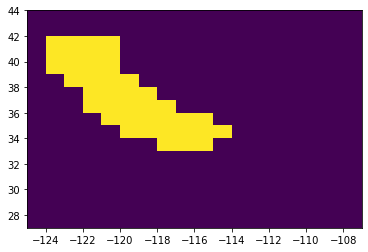

In [19]:
# plotting grid points for CA
plt.pcolormesh(lon_bndGrid, lat_bndGrid, maskCA, shading='auto')

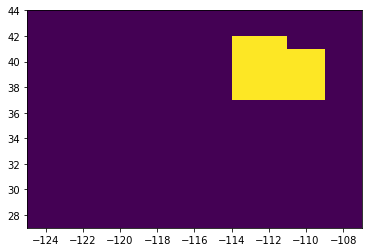

In [20]:
# plotting grid points for UT
plt.pcolormesh(lon_bndGrid, lat_bndGrid, maskUT, shading='auto')

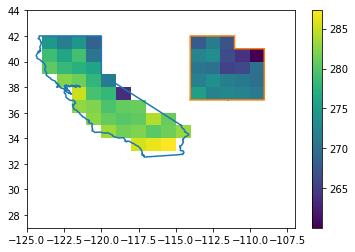

In [21]:
# finding the temperature grids for CA and UT as well as mean values
tempCA = temp_bnd*maskCA
tempUT = temp_bnd*maskUT
meanCA = np.nanmean(tempCA)
meanUT = np.nanmean(tempUT)

# total snow fall and difference between the two states
snowCA = np.sum(snow_bnd*maskCA)
snowUT = np.sum(snow_bnd*maskUT)
snowDiff = snowCA-snowUT

# creating a grid that contains the temperature for both states
temp_combine = np.add(tempCA,tempUT)
temp_combine[temp_combine==-0] = np.nan

# maskCA[maskCA==0] = np.nan
# maskUT[maskUT==0] = np.nan

# plot
plt.pcolormesh(lon_bndGrid, lat_bndGrid, temp_combine[0], shading='auto')
plt.plot(boundaryCA[:,1], boundaryCA[:,0])
plt.plot(boundaryUT[:,1], boundaryUT[:,0])
cbar = plt.colorbar()

# print(maskUT)

In [22]:
# printing some relevant statistics
print (meanCA)
print(meanUT)
print(snowCA)
print (snowUT)
print(snowDiff)

36.504987429949196
20.28092996435228
0.0002416892853556729
0.00018917869465440162
5.251059070127129e-05


## Report
The surface temperature dataset was chosen for this report, although data from the other datasets was also considered. The missing value of this dataset is -9999.0. The unit for surface temperature is in Kelvin. 
There are 40 grid points located in California and 23 can be found in Utah. The average surface temperature during January 2021 in California was 279.3 K and 269.8 K for Utah. Between the 2 states, Carlifornia has more snow, and the difference is 5.3e-05 kg m-2 s-1.6